In [25]:
import pandas as pd
df=pd.read_csv('elnino.csv')
df

,Observation,Year,Month,Day,Date,Latitude,Longitude,Zonal Winds,Meridional Winds,Humidity,Air Temp,Sea Surface Temp
0,1,80,3,7,800307,-0.02,-109.46,-6.8,0.7,.,26.14,26.24
1,2,80,3,8,800308,-0.02,-109.46,-4.9,1.1,.,25.66,25.97
2,3,80,3,9,800309,-0.02,-109.46,-4.5,2.2,.,25.69,25.28
3,4,80,3,10,800310,-0.02,-109.46,-3.8,1.9,.,25.57,24.31
4,5,80,3,11,800311,-0.02,-109.46,-4.2,1.5,.,25.3,23.19
...,...,...,...,...,...,...,...,...,...,...,...,...
178075,178076,98,6,11,980611,8.96,-140.33,-5.1,-0.4,94.1,26.04,28.14
178076,178077,98,6,12,980612,8.96,-140.32,-4.3,-3.3,93.2,25.8,27.87
178077,178078,98,6,13,980613,8.95,-140.34,-6.1,-4.8,81.3,27.17,27.93
178078,178079,98,6,14,980614,8.96,-140.33,-4.9,-2.3,76.2,27.36,28.03


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [27]:
print(df.columns)



Index(['Observation', ' Year', ' Month', ' Day', ' Date', ' Latitude',
       ' Longitude', ' Zonal Winds', ' Meridional Winds', ' Humidity',
       ' Air Temp', ' Sea Surface Temp'],
      dtype='object')


In [28]:
features = ['Zonal Winds', 'Meridional Winds', 'Humidity', 'Air Temp']
target = 'Sea Surface Temp'


df.columns = df.columns.str.strip()


numeric_columns = ['Zonal Winds', 'Meridional Winds', 'Humidity', 'Air Temp', 'Sea Surface Temp']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

df = df.dropna(subset=features + [target])


X = df[features]
y = df[target]




In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()


model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')



Mean Squared Error: 0.31556325794250184


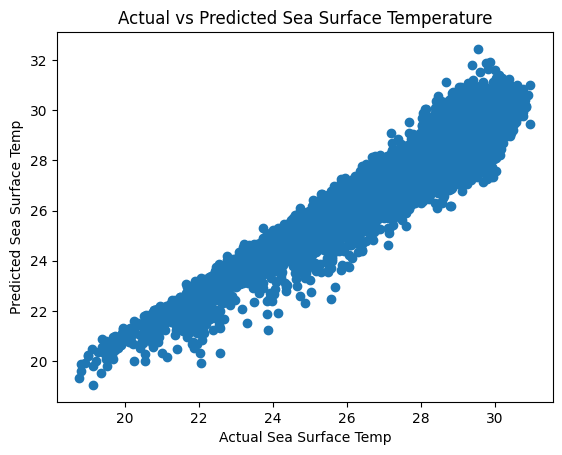

In [30]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sea Surface Temp')
plt.ylabel('Predicted Sea Surface Temp')
plt.title('Actual vs Predicted Sea Surface Temperature')
plt.show()